# Exploratory Data Analysis with Pandas

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

We will go through this notebook to:
1. Learn to reshape our data and see some features by performing operations over it
2. Discover visualization methods

## Transforming and summarizing data

In [ ]:
import urllib2
import pandas as pd

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"

airports = pd.read_csv(url,header=None)
airports.dtypes

1. **Airport** ID	Unique OpenFlights identifier for this airport.
2. **Name**	Name of airport. May or may not contain the City name.
3. **City**	Main city served by airport. May be spelled differently from Name.
4. **Country**	Country or territory where airport is located.
5. **IATA/FAA**	3-letter FAA code, for airports located in Country "United States of America". 3-letter IATA code, for all other airports. Blank if not assigned.
6. **ICAO**	4-letter ICAO code. Blank if not assigned.
7. **Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
8. **Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
9. **Altitude**	In feet.
10. **Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
11. **DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
12. **Tz database** time zone

In [87]:
import numpy as np
h = ["airport_id","name","city","country","IATA","ICAO","lat","lon","alt","tz","DST","tz_db"]
airports.columns = h

airports.dtypes

airport_id      int64
name           object
city           object
country        object
IATA           object
ICAO           object
lat           float64
lon           float64
alt             int64
tz            float64
DST            object
tz_db          object
dtype: object

Convert alt to m

In [103]:
airports.alt = airports.alt * 0.3048

In [92]:
airports.dtypes

airport_id      int64
name           object
city           object
country        object
IATA           object
ICAO           object
lat           float64
lon           float64
alt             int64
tz              int32
DST            object
tz_db          object
dtype: object

Check if we have nans.

In [94]:
airports.isnull().sum(axis=0)

airport_id       0
name             0
city             0
country          0
IATA          2227
ICAO            64
lat              0
lon              0
alt              0
tz               0
DST              0
tz_db            0
dtype: int64

In [95]:
airports.IATA = airports.IATA.fillna("Blank")
airports.ICAO = airports.ICAO.fillna("Blank")

Let's check outliers.
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

In [99]:
((airports.lat > 90) & (airports.lat < -90)).any()

False

In [100]:
((airports.lon > 180) & (airports.lon < -180)).any()

False

Altitude

In [104]:
airports.alt.describe()

count    8107.000000
mean      284.515366
std       495.221026
min      -385.876800
25%        11.582400
50%        82.905600
75%       310.896000
max      4411.065600
Name: alt, dtype: float64

let's explore 5 and 95 percentiles

In [107]:
qtls = airports.alt.quantile([.05,.95])
qtls

0.05       0.00000
0.95    1339.35216
Name: alt, dtype: float64

In [111]:
(airports.alt < qtls[0.05]).sum()

13

In [113]:
(airports.alt > qtls[0.95]).sum()

406

In [114]:
airports[(airports.alt < qtls[0.05])]

,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
575,580,Schiphol,Amsterdam,Netherlands,AMS,EHAM,52.308613,4.763889,-3.3528,1,E,Europe/Amsterdam
584,589,Lelystad,Lelystad,Netherlands,Blank,EHLE,52.460278,5.527222,-3.9624,1,E,Europe/Amsterdam
586,591,Rotterdam,Rotterdam,Netherlands,RTM,EHRD,51.956944,4.437222,-4.5720,1,E,Europe/Amsterdam
1105,1126,Alexandria Intl,Alexandria,Egypt,ALY,HEAX,31.183903,29.948889,-1.8288,2,U,Africa/Cairo
1568,1595,En Yahav,Eyn-yahav,Israel,Blank,LLEY,30.621656,35.203325,-49.9872,2,U,Asia/Jerusalem
1573,1600,I Bar Yehuda,Metzada,Israel,Blank,LLMZ,31.328169,35.388608,-385.8768,2,U,Asia/Jerusalem
2080,2123,Rasht,Rasht,Iran,RAS,OIGG,37.325314,49.605817,-12.1920,3,E,Asia/Tehran
2103,2151,Ramsar,Ramsar,Iran,RZR,OINR,36.909908,50.679589,-21.3360,3,E,Asia/Tehran
2887,2966,Astrakhan,Astrakhan,Russia,ASF,URWA,46.283333,48.006278,-19.8120,4,N,Europe/Moscow
3590,3689,Imperial Co,Imperial,United States,IPL,KIPL,32.834219,-115.578744,-16.4592,-8,A,America/Los_Angeles


Additionaly to what we have seen, we have extra functions to see how shaped and what values our data has.
* **sample data:** we can take a random sample of the obesrvations to avoid the ordering bias (if we head data, it can be sorted so some of the examples are ok, let's say the 100 first and the rest have some errors)
* **sort data:** to get obesrvations with higher or lower values

In [116]:
airports.sample(n=10)

,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
730,741,Gavle,Gavle,Sweden,GVX,ESSK,60.593333,16.951389,68.2752,1,E,Europe/Stockholm
981,999,Ndjamena Hassan Djamous,N'djamena,Chad,NDJ,FTTJ,12.133689,15.034019,295.0464,1,N,Africa/Ndjamena
7800,9235,Meedhuffushi Seaplane dock,Meedhuffushi Island,Maldives,Blank,\N,3.003899,73.000696,0.0000,5,U,Indian/Maldives
4857,5464,Summer Beaver Airport,Summer Beaver,Canada,SUR,CJV7,52.708600,-88.541900,253.5936,-5,A,America/Toronto
400,403,Emden,Emden,Germany,EME,EDWE,53.391186,7.227408,0.6096,1,E,Europe/Berlin
3971,4080,Stavns,Samsoe,Denmark,Blank,EKSS,55.890000,10.620000,0.3048,1,E,Europe/Copenhagen
6303,7729,West 30th St. Heliport,New York,United States,JRA,KJRA,40.754500,-74.007100,2.1336,-5,A,America/New_York
3830,3940,Bali Ngurah Rai,Denpasar,Indonesia,DPS,WADD,-8.748169,115.167172,4.2672,8,N,Asia/Makassar
3852,3957,S. Darius,Kaunas,Lithuania,Blank,EYKS,54.879792,23.881511,74.9808,2,E,Europe/Vilnius
533,538,Benbecula,Benbecula,United Kingdom,BEB,EGPL,57.481111,-7.362778,5.7912,0,E,Europe/London


In [118]:
airports.sort_values(by="alt",ascending=False)[:10]

,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
7875,9310,Yading Daocheng,Daocheng,China,DCY,ZUDC,29.323100,100.053300,4411.0656,8,N,Asia/Chongqing
5269,6396,Qamdo Bangda Airport,Bangda,China,BPX,ZUBD,30.553600,97.108300,4333.9512,8,U,Asia/Chongqing
7487,8921,Kangding Airport,Kangding,China,KGT,ZUKD,30.157500,101.734722,4280.0016,8,N,Asia/Chongqing
6505,7932,Gunsa,Shiquanhe,China,NGQ,ZUAL,32.100270,80.052778,4200.1440,8,N,Asia/Chongqing
5394,6935,Irkutsk-2,Irkutsk,Russia,Blank,UIIR,52.367800,104.183000,4087.6728,9,N,Asia/Irkutsk
2690,2762,El Alto Intl,La Paz,Bolivia,LPB,SLLP,-16.513339,-68.192256,4061.4600,-4,U,America/La_Paz
3988,4097,Lhasa-Gonggar,Lhasa,China,LXA,ZULS,29.297778,90.911944,4003.8528,8,U,Asia/Chongqing
6468,7894,Yushu Batang,Yushu,China,YUS,ZLYS,32.825000,97.125000,3962.4000,8,U,Asia/Chongqing
2692,2764,Capitan Nicolas Rojas,Potosi,Bolivia,POI,SLPO,-19.543069,-65.723706,3935.8824,-4,U,America/La_Paz
7534,8969,Copacabana Airport,Copacabana,Bolivia,Blank,SLCC,-16.183326,-69.087501,3837.7368,-4,U,America/La_Paz


We can create new variables

In [123]:
airports["continent"] = airports.tz_db.str.split("/").str[0]
airports.continent.unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', '\\N', 'Australia', 'Antarctica'], dtype=object)

In [138]:
airports.continent.value_counts()

America       3163
Europe        1813
Asia          1544
Africa         702
Pacific        339
Australia      252
Indian         113
\N              92
Atlantic        63
Antarctica      19
Arctic           7
Name: continent, dtype: int64

In [143]:
airports[airports.continent == "\\N"].size

0

In [141]:
airports.continent = airports.continent.replace('\\N',"unknown")
airports.tz_db = airports.tz_db.replace('\\N',"unknown")

airports.continent.unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', 'unknown', 'Australia', 'Antarctica'], dtype=object)

We can place hemisfere

In [147]:
hem_select = lambda x: "South" if x < 0 else "North"
airports["hemisphere"] = airports.lat.apply(hem_select)

We can calculate percentages.

In [150]:
(airports.hemisphere.value_counts() / airports.shape[0]) * 100

North    80.90539
South    19.09461
Name: hemisphere, dtype: float64

In [151]:
(airports.continent.value_counts() / airports.shape[0]) * 100

America       39.015665
Europe        22.363390
Asia          19.045270
Africa         8.659183
Pacific        4.181571
Australia      3.108425
Indian         1.393857
unknown        1.134822
Atlantic       0.777106
Antarctica     0.234365
Arctic         0.086345
Name: continent, dtype: float64

In [154]:
((airports.country.value_counts() / airports.shape[0]) * 100)[:10]

United States     20.932527
Canada             5.365733
Germany            3.959541
Australia          3.244110
Russia             3.071420
France             2.874059
China              2.701369
Brazil             2.627359
United Kingdom     2.590354
India              1.726903
Name: country, dtype: float64

Let's transformate alt into qualitative

In [165]:
airports["alt_type"] = pd.cut(airports.alt,bins=3,labels=["low","med","high"])

Let's group data:

In [220]:
airp_group = airports.groupby(["continent","alt_type"])
airp_group

The groups attribute is a dict whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. In the above example we have:

In [239]:
airp_group.groups.keys()

[('Africa', 'low'),
 ('Antarctica', 'high'),
 ('Arctic', 'low'),
 ('America', 'med'),
 ('Africa', 'med'),
 ('Atlantic', 'low'),
 ('unknown', 'low'),
 ('Indian', 'med'),
 ('Antarctica', 'med'),
 ('Europe', 'med'),
 ('America', 'low'),
 ('Australia', 'med'),
 ('Australia', 'low'),
 ('America', 'high'),
 ('Pacific', 'med'),
 ('Asia', 'low'),
 ('Antarctica', 'low'),
 ('Indian', 'low'),
 ('Europe', 'low'),
 ('Asia', 'high'),
 ('Asia', 'med'),
 ('Pacific', 'low')]

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data.

In [241]:
airp_group.aggregate(len).head()

airport_id    name    city  country    IATA    ICAO  \
continent alt_type                                                        
Africa    low            566.0   566.0   566.0    566.0   566.0   566.0   
          med            136.0   136.0   136.0    136.0   136.0   136.0   
          high             NaN     NaN     NaN      NaN     NaN     NaN   
America   low           2950.0  2950.0  2950.0   2950.0  2950.0  2950.0   
          med            192.0   192.0   192.0    192.0   192.0   192.0   

                       lat     lon     alt      tz     DST   tz_db  hemisphere  
continent alt_type                                                              
Africa    low        566.0   566.0   566.0   566.0   566.0   566.0       566.0  
          med        136.0   136.0   136.0   136.0   136.0   136.0       136.0  
          high         NaN     NaN     NaN     NaN     NaN     NaN         NaN  
America   low       2950.0  2950.0  2950.0  2950.0  2950.0  2950.0      2950.0  
          med        192.0   192.0   192.0   192.0   192.0   192.0       192.0

In [242]:
airp_group.size()

continent   alt_type
Africa      low          566
            med          136
America     low         2950
            med          192
            high          21
Antarctica  low           16
            med            2
            high           1
Arctic      low            7
Asia        low         1419
            med          108
            high          17
Atlantic    low           63
Australia   low          251
            med            1
Europe      low         1797
            med           16
Indian      low          110
            med            3
Pacific     low          331
            med            8
unknown     low           92
dtype: int64

In [246]:
airp_group["alt"].agg({"len":len}).head()

len
continent alt_type        
Africa    low        566.0
          med        136.0
America   low       2950.0
          med        192.0
          high        21.0

In [248]:
airp_group["alt"].agg({"max":np.max,"min":np.min,"mean":np.mean}).head()

max         mean        min
continent alt_type                                   
Africa    low       1207.9224   389.929671    -1.8288
          med       2697.4800  1585.031718  1215.8472
America   low       1209.4464   186.728952   -16.4592
          med       2805.6840  1777.171325  1216.1520
          high      4061.4600  3401.916343  2812.6944

Pandas has a handy .unstack() method—use it to convert the results into a more readable format and store that as a new variable

In [254]:
airp_group["alt"].sum().unstack()

alt_type,low,med,high
continent,,,
Africa,220700.1936,215564.3136,NaN
America,550850.4096,341216.8944,71440.2432
Antarctica,1093.9272,4876.8000,2834.6400
Arctic,73.1520,NaN,NaN
Asia,254935.0248,180973.1712,62836.6536
Atlantic,4404.0552,NaN,NaN
Australia,35463.4800,1298.4480,NaN
Europe,289096.3992,26754.7344,NaN
Indian,8365.8456,3996.2328,NaN


Remember that we also saw how to pivot table

In [383]:
airports.pivot_table(index="hemisphere",values="alt",aggfunc=np.mean)

hemisphere
North    259.402831
South    390.919192
Name: alt, dtype: float64

In [384]:
airports.groupby("hemisphere").alt.mean()

hemisphere
North    259.402831
South    390.919192
Name: alt, dtype: float64

## Visualizing data

One of the most useful tools for exploring data anf presenting results is through visual representations.

In [375]:
my_df = pd.DataFrame(np.ones(100),columns=["y"])
my_df.head(10)

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [376]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.pylab.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.style.use('ggplot')

In [377]:
my_df.plot()

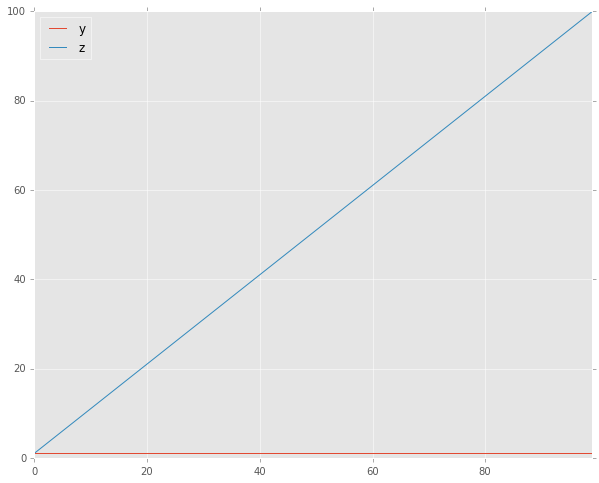

In [378]:
my_df["z"] = my_df.y.cumsum()
my_df.plot()

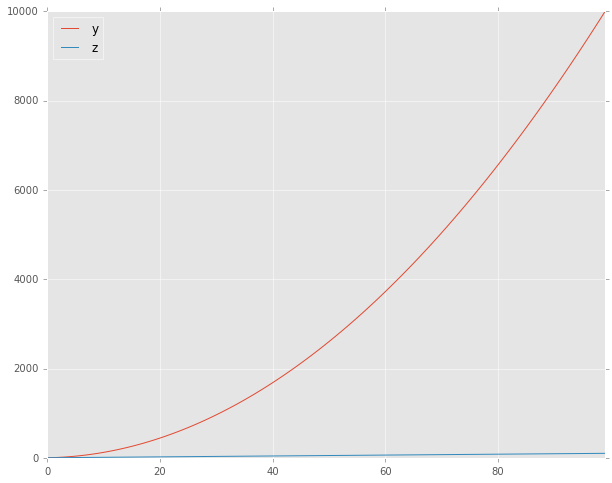

In [379]:
my_df.y = my_df.z ** 2
my_df.plot()

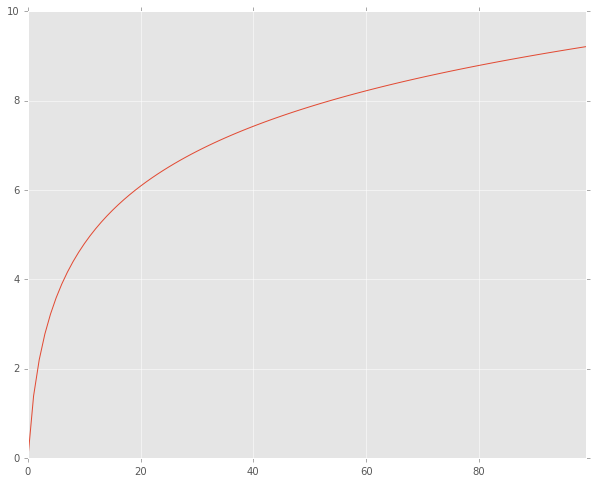

In [380]:
my_df.z = np.log(my_df.y)
my_df.z.plot()

We can plot with different plot types:
    * ‘bar’ or ‘barh’ for bar plots
    * ‘hist’ for histogram
    * ‘box’ for boxplot
    * ‘kde’ or 'density' for density plots
    * ‘area’ for area plots
    * ‘scatter’ for scatter plots
    * ‘hexbin’ for hexagonal bin plots
    * ‘pie’ for pie plots

### Bar

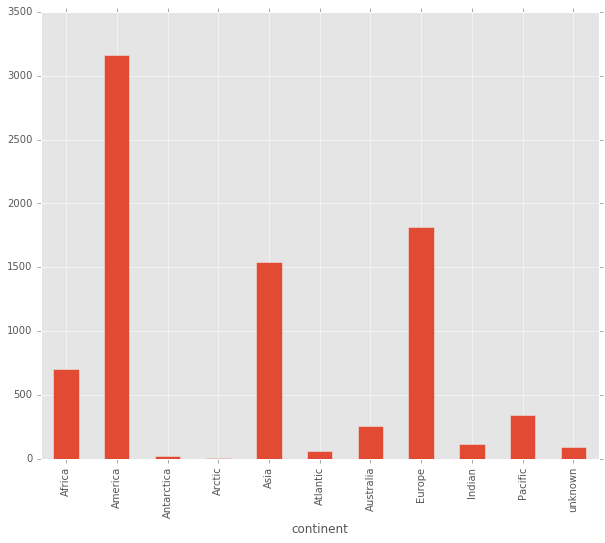

In [356]:
airports.groupby("continent").size().plot(kind="bar")

### Multiple Bars

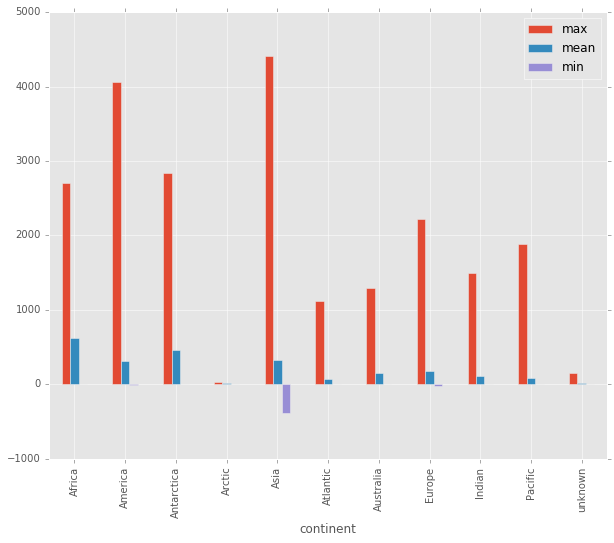

In [381]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="bar")

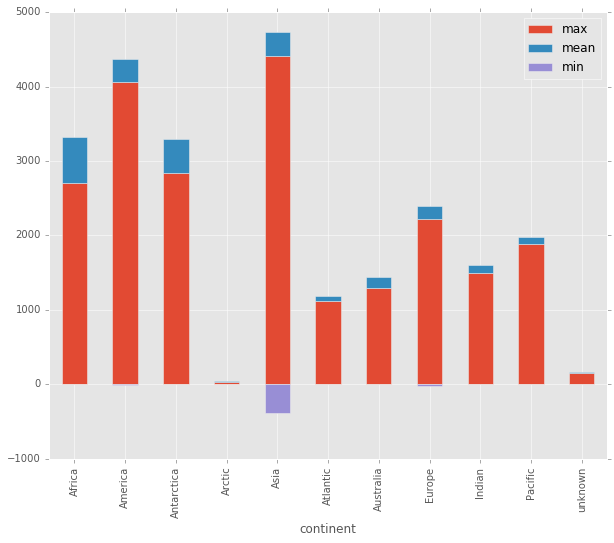

In [358]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="bar",stacked=True)

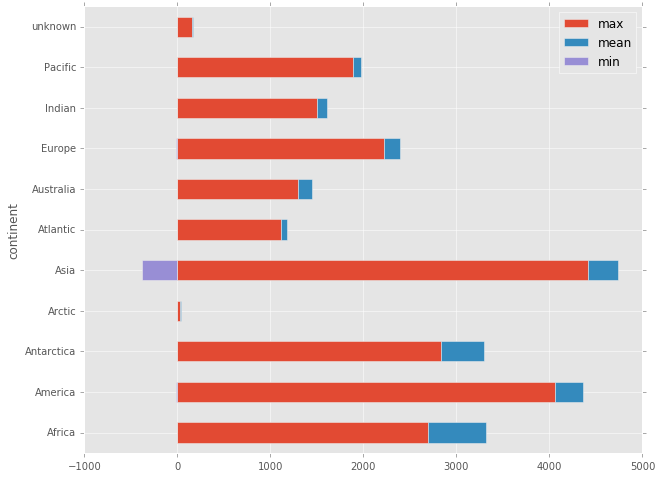

In [359]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="barh",stacked=True)

### Histogram

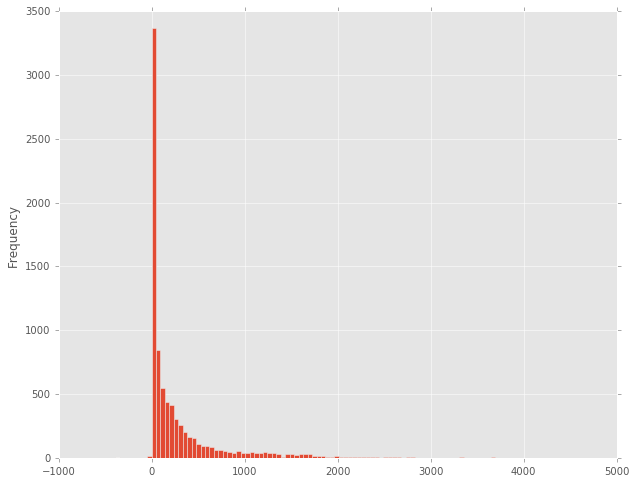

In [360]:
airports.alt.plot(kind="hist",bins=100)

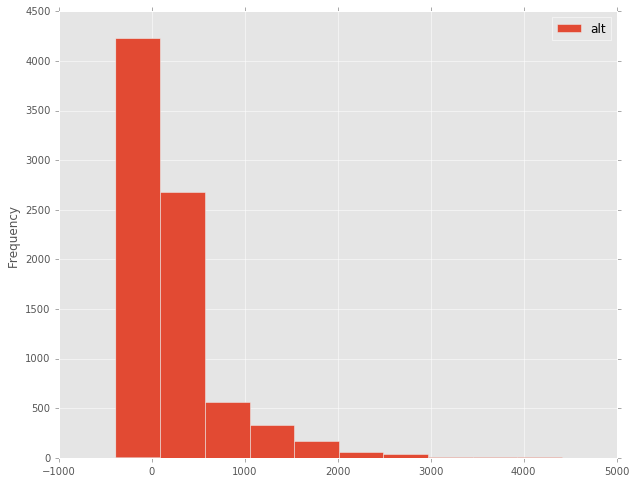

In [361]:
airports.loc[:,["alt"]].plot(kind="hist")

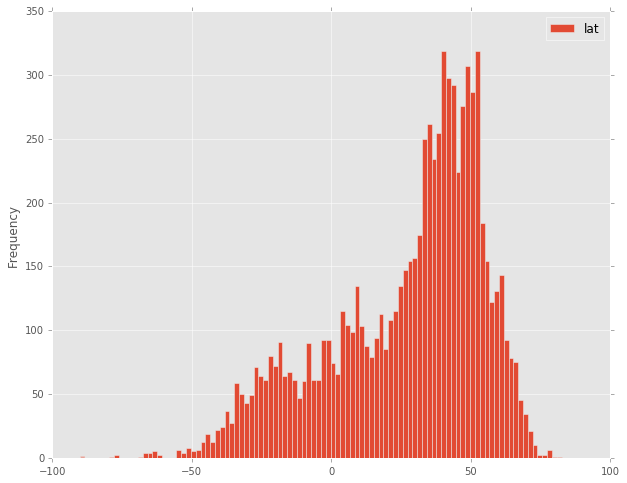

In [362]:
airports.loc[:,["lat"]].plot(kind="hist",bins=100)

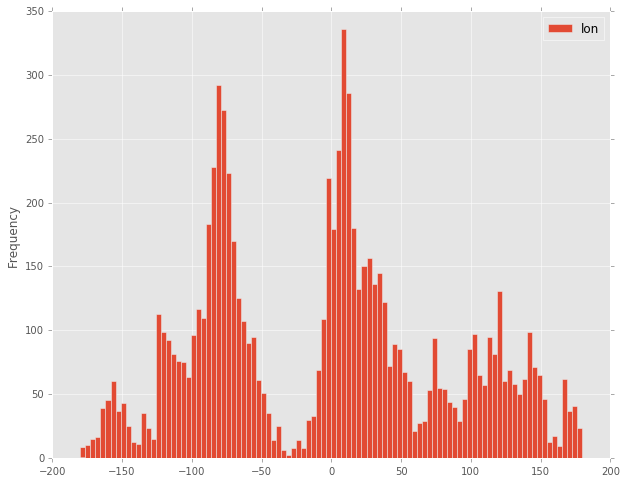

In [363]:
airports.loc[:,["lon"]].plot(kind="hist",bins=100)

### Box Plots

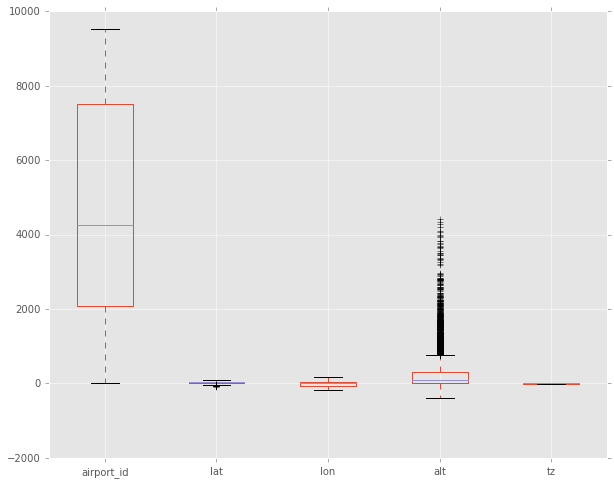

In [364]:
airports.plot.box()

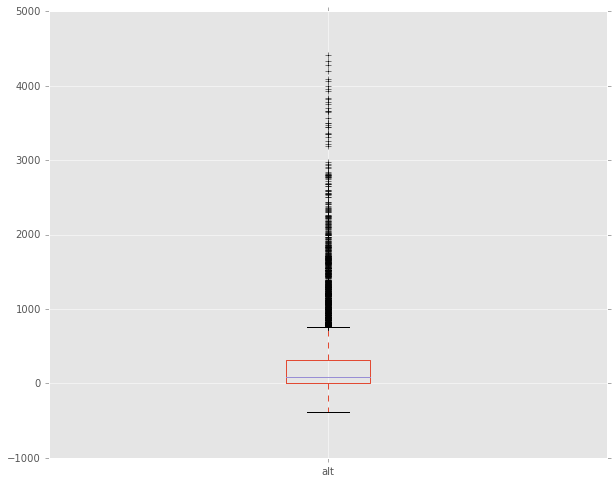

In [365]:
airports.alt.plot.box()

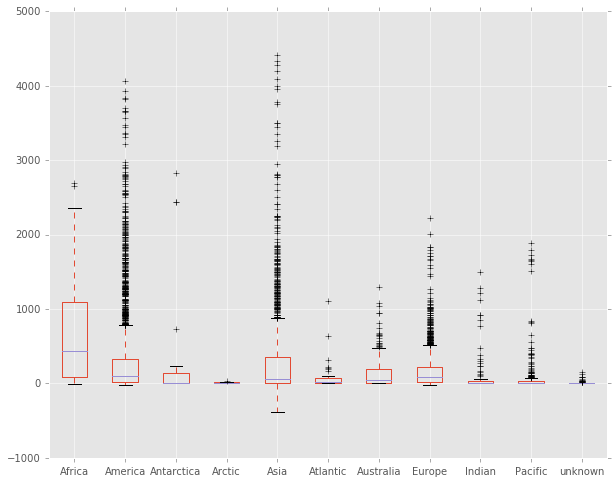

In [366]:
airports.pivot(columns="continent").alt.plot.box()

### Area Plots

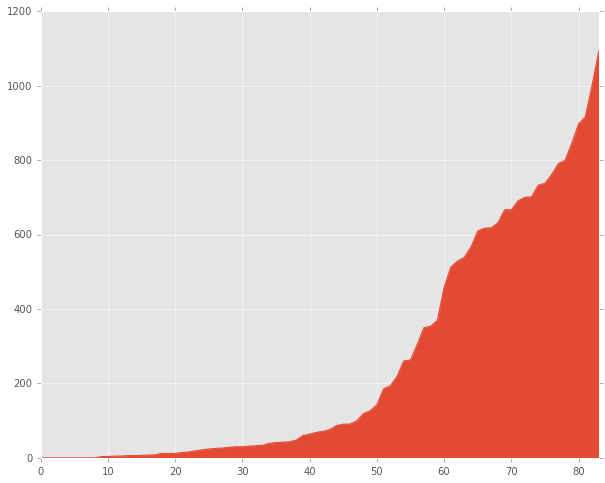

In [367]:
sp_airp = airports[airports.country=="Spain"]
spain_alt = sp_airp.sort_values(by="alt").alt
spain_alt.index = range(spain_alt.size)
spain_alt.plot.area()

### Scatter Plot

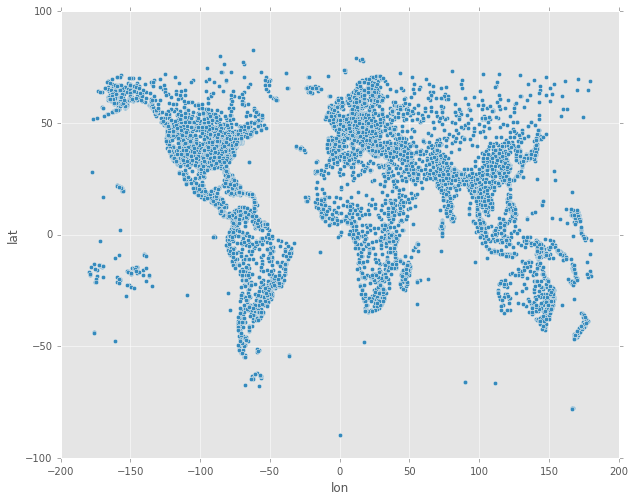

In [368]:
airports.plot.scatter(y="lat",x="lon")

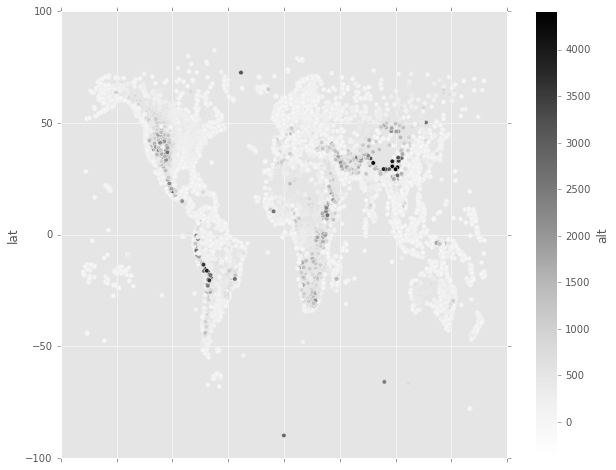

In [369]:
airports.plot.scatter(y="lat",x="lon",c="alt")

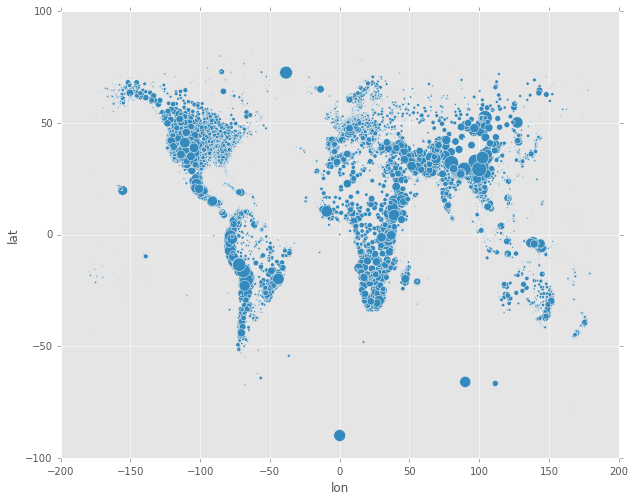

In [370]:
airports.plot.scatter(y="lat",x="lon",s=airports["alt"]/20)

### Hex Bins

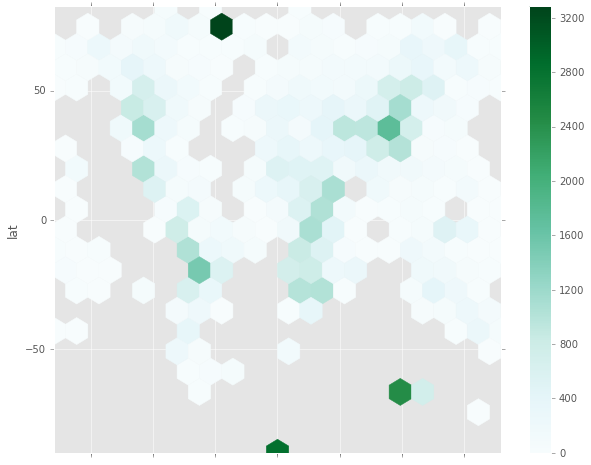

In [371]:
airports.plot.hexbin(x="lon",y="lat",C="alt",gridsize=20)

### Density Plot

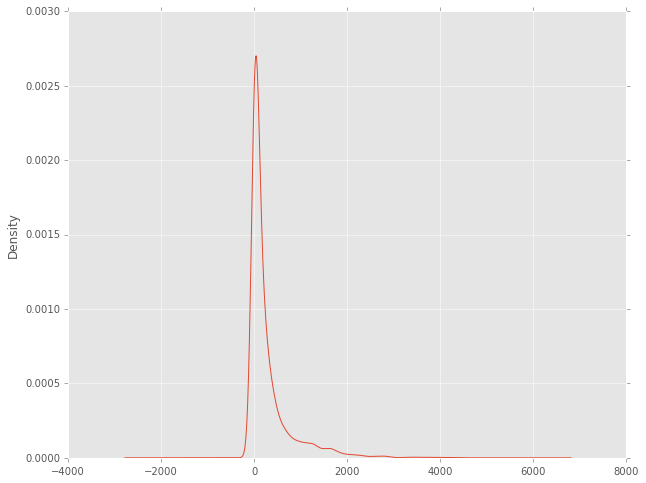

In [372]:
airports.alt.plot.kde()

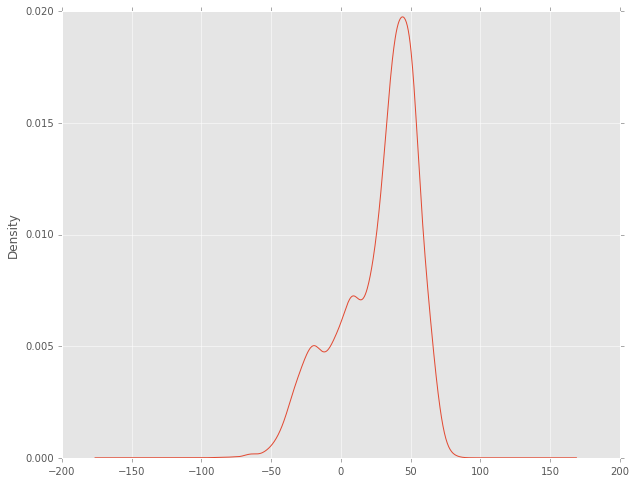

In [373]:
airports.lat.plot.kde()

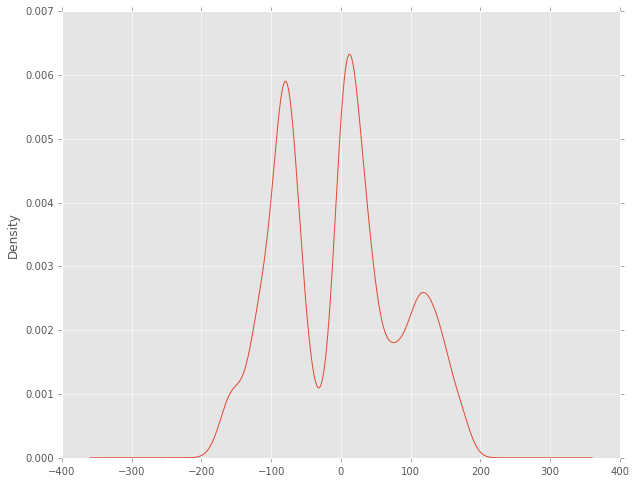

In [374]:
airports.lon.plot.kde()

# Exercices

The exercices will be based over 2016 New Coder Survey, which is a survey answered by 15000 coders and contains 46 questions (each question is a variable).

Data is available https://github.com/FreeCodeCamp/2016-new-coder-survey/blob/master/data/2016-New-Coder-Survey-Data-Summary.csv

Over these dataset, please answer the following questions

*It is highly recommended that instead of cleaning the whole dataset, you do an error and outlier analyisis to each variable that you are going to use before answering the question*

*The variables that you need for each question are in the dataset, you have only to browse and select these that correspond*

** Show in a barplot top 10 nationalities with more responants **

** Show in a barplot top 10 countires with more responants **

** Do an outlier analysis of the ages. How many otliers there are using box-and whiskers? How many using 5%-95% **

** Draw a box plot for ages in USA**

** Show the average Age per country. Which is the country with older respondants? Which the conutry with younger?**

** Do an outlier analysis of the incomes. How many otliers there are using box-and whiskers? How many using 5%-95% **

** Draw a box plot for incomes in Spain**

** Which is the mean income? And the mean income per age? Plot an area plot. Split Incomes into 4 ranges and plot a barplot for top ten respondant countries with 4 bars counting how many people is in each range**

** Do a density plot with incomes **

** Do an histogram with incomes. Select a right number of bins som density plot and histogram are similar **

** Do an scatter plot, ploting age and commut time with a third variable which is income **